In [112]:
# 분류 문제에는 타깃값(종속변수)를 예측할 수도 있고, 타깃값일 확률을 예측할 수 도 있다.
# 타깃값이 0 이나 1 이냐가 아닌 1일 확률을 예측한다.



In [113]:
import pandas as pd

data_path = './cat-in-the-dat/'

train = pd.read_csv(data_path + 'train.csv' , index_col = 'id')
test = pd.read_csv(data_path + 'test.csv' , index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv' , index_col= 'id')

train

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,0,T,N,Red,Trapezoid,Snake,India,Oboe,...,e027decef,1,Contributor,Freezing,k,K,dh,3,8,0
299996,0,0,0,F,Y,Green,Trapezoid,Lion,Russia,Piano,...,80f1411c8,2,Novice,Freezing,h,W,MO,3,2,0
299997,0,0,0,F,Y,Blue,Star,Axolotl,Russia,Oboe,...,314dcc15b,3,Novice,Boiling Hot,o,A,Bn,7,9,1


In [114]:
train.shape , test.shape

((300000, 24), (200000, 23))

In [115]:
test

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
300001,0,0,0,T,N,Red,Square,Lion,Canada,Piano,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
300002,1,0,1,F,Y,Blue,Square,Dog,China,Piano,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
300003,0,0,1,T,Y,Red,Star,Cat,China,Piano,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
300004,0,1,1,F,N,Red,Trapezoid,Dog,China,Piano,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,F,N,Green,Square,Lion,Canada,Theremin,...,9e4b23160,acc31291f,1,Novice,Lava Hot,j,A,Gb,1,3
499996,1,0,0,F,Y,Green,Trapezoid,Lion,China,Piano,...,cfbd87ed0,eae3446d0,1,Contributor,Lava Hot,f,S,Ed,2,2
499997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,Oboe,...,1108bcd6c,33dd3cf4b,1,Novice,Boiling Hot,g,V,TR,3,1


In [116]:
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


In [117]:
submission.head()

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


In [118]:
test.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
300001,0,0,0,T,N,Red,Square,Lion,Canada,Piano,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
300002,1,0,1,F,Y,Blue,Square,Dog,China,Piano,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
300003,0,0,1,T,Y,Red,Star,Cat,China,Piano,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
300004,0,1,1,F,N,Red,Trapezoid,Dog,China,Piano,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11


In [119]:
# 이번 문제의 목표는 각 테스트 데이터의 타깃값이 1일 확률을 예측하는 것이다.


train.describe().T

,count,mean,std,min,25%,50%,75%,max
bin_0,300000.0,0.127503,0.333537,0.0,0.0,0.0,0.0,1.0
bin_1,300000.0,0.256607,0.436761,0.0,0.0,0.0,1.0,1.0
bin_2,300000.0,0.383223,0.486173,0.0,0.0,0.0,1.0,1.0
ord_0,300000.0,1.479567,0.712524,1.0,1.0,1.0,2.0,3.0
day,300000.0,3.007817,1.817949,1.0,2.0,3.0,4.0,7.0
month,300000.0,5.771113,3.843519,1.0,2.0,4.0,9.0,12.0
target,300000.0,0.305880,0.460780,0.0,0.0,0.0,1.0,1.0


In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 0 to 299999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   bin_0   300000 non-null  int64 
 1   bin_1   300000 non-null  int64 
 2   bin_2   300000 non-null  int64 
 3   bin_3   300000 non-null  object
 4   bin_4   300000 non-null  object
 5   nom_0   300000 non-null  object
 6   nom_1   300000 non-null  object
 7   nom_2   300000 non-null  object
 8   nom_3   300000 non-null  object
 9   nom_4   300000 non-null  object
 10  nom_5   300000 non-null  object
 11  nom_6   300000 non-null  object
 12  nom_7   300000 non-null  object
 13  nom_8   300000 non-null  object
 14  nom_9   300000 non-null  object
 15  ord_0   300000 non-null  int64 
 16  ord_1   300000 non-null  object
 17  ord_2   300000 non-null  object
 18  ord_3   300000 non-null  object
 19  ord_4   300000 non-null  object
 20  ord_5   300000 non-null  object
 21  day     300000 non-null  int64 
 

In [121]:
def resumetable(df):
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes , columns = ['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns = {'index' : '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values


    return summary

resumetable(train)

# 이진 (binary) 피처 : bin_0 ~ bin_4 ==> 고윳값 개수가 2개씩 ==> 이진 피처이다.
# ==> bin_0~ 2 은 데이터타입이 int로써, 실제값이 0또는 1로 구성되어있다.
# ==> bin_3~ 4 는 데이터타입이 object로써, 실제값이 T또는 F , Y또는 N이다.
# 명목형(nominal) 피처 : nom_0 ~ nom_9
# 명목형 피처는 모두 object 타입이고, 결측값은 없다.
# 순서형(ordinal) 피처 : ord_0 ~ ord_5
#
# 그 외 피처 : day , month , target

데이터셋 형상 : (300000, 24)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


In [122]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값 : {train[feature].unique()}')
# 순서형 데이터들의 고윳값 출력

ord_0 고윳값 : [2 1 3]
ord_1 고윳값 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [123]:
for i in range(3,6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값 : {train[feature].unique()}')

ord_3 고윳값 : ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고윳값 : ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고윳값 : ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb

In [124]:
print('day 고윳값 : ',train['day'].unique())
print('month 고윳값 :' , train['month'].unique())
print('target 고윳값 : ', train['target'].unique())

day 고윳값 :  [2 7 5 4 3 1 6]
month 고윳값 : [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값 :  [0 1]


## 데이터 시각화

In [125]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

사각형 높이 : 208236
사각형 너비 : 0.8
사각형 왼쪽 테두리의 x축 위치 :  -0.4
텍스트 위치의 x좌표 :  0.0
텍스트 위치의 y좌표 :  208536.0


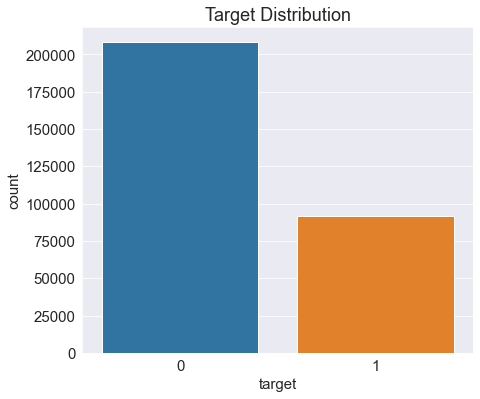

In [126]:
mpl.rc('font' , size = 15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target' , data=train)
ax.set_title('Target Distribution')

rectangle = ax.patches[0] # 첫 번째 Rectangle 객체
print('사각형 높이 :' , rectangle.get_height())
print('사각형 너비 :', rectangle.get_width())
print('사각형 왼쪽 테두리의 x축 위치 : ' , rectangle.get_x())

print('텍스트 위치의 x좌표 : ' , rectangle.get_x() + rectangle.get_width() / 2.0)
print('텍스트 위치의 y좌표 : ' , rectangle.get_height() + len(train) *0.001)

Text(0.5, 1.0, 'Target Distribution')

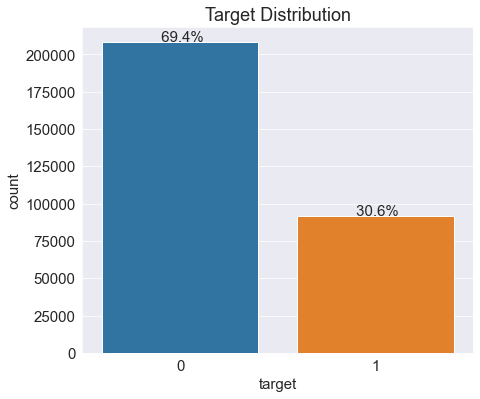

In [127]:
def write_percent(ax , total_size):
    # 도형 객체를 순회하며 막대 상단에 타깃값 비율 표시
    for patch in ax.patches:
        height = patch.get_height() # 도형 높이(데이터 개수)
        width = patch.get_width() # 도형 넓이
        left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율

        # (x,y) 좌표에 텍스트 입력
        ax.text(x=left_coord + width/2.0 , y = height + total_size*0.001,
                s = f'{percent : 1.1f}%', ha= 'center')
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target' , data = train)
write_percent(ax , len(train)) # 비율 표시
ax.set_title('Target Distribution')

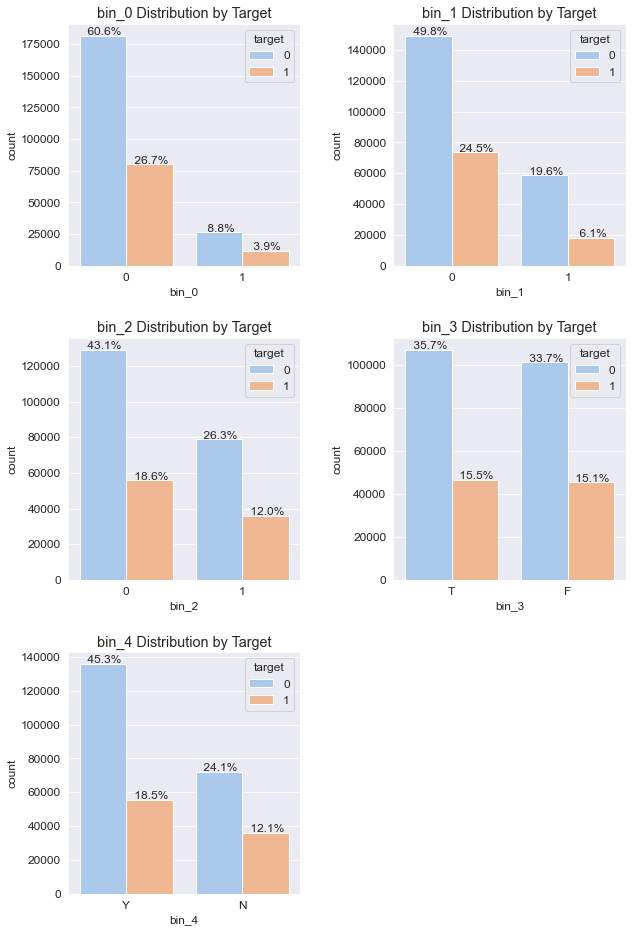

In [128]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치

# 3행 2열
mpl.rc('font' , size = 12)
grid = gridspec.GridSpec(3,2) # 그래프(서브플롯)을 3행 2열로 배치
plt.figure(figsize=(10,16)) # 전체 Figure 크기 설정
plt.subplots_adjust(wspace= 0.4 , hspace= 0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features = ['bin_0' , 'bin_1' , 'bin_2' , 'bin_3', 'bin_4'] # 피처 목록

for idx, feature in enumerate(bin_features) :
    ax = plt.subplot(grid[idx])

    # ax 축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature , data = train , hue = 'target' , palette = 'pastel' , ax= ax)
    # hue는 세부적으로 나눠 그릴 기준 피처, 여기서는 타깃값(target)을 전달했다.
    ax.set_title(f'{feature} Distribution by Target') # 그래프 제목 설정
    write_percent(ax, len(train))

## 교차분석표 생성 함수 만들기

In [129]:
# 교차표(cross-tabulation) 혹은 교차분석표는 범주형 데이터 2개를 비교 분석하는 데 사용되는 표로, 각 범주형 데이터의 빈도나 통계량을 행과 열로 결합해놓은 표를 말한다.

# 교차분석표를 만드는 이유는 명목형 피처별 타깃값 1 비율을 구하기 위해서이다.

pd.crosstab(train['nom_0'] , train['target'])

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [130]:
crosstab = pd.crosstab(train['nom_0'] , train['target'] , normalize= 'index') * 100
# 열을 기준으로 정규화하려면 normalize = 'columns'로 설정해 실행하면 된다.
# 정규화한 값(비율) 구하기.
crosstab

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


In [131]:
crosstab = crosstab.reset_index() # 인덱스 재설정
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [142]:
def get_crosstab(df , feature):
    crosstab = pd.crosstab(df[feature] , df['target'] , normalize='index') * 100
    crosstab = crosstab.reset_index()
    return crosstab

crosstab = get_crosstab(train, 'nom_0')
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [133]:
crosstab[1] # nom_0 피처의 고윳값별 타깃값 1 비율이다.

0    24.179024
1    32.714522
2    35.105173
Name: 1, dtype: float64

In [134]:
def plot_pointplot(ax , feature , crosstab):
    ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성
    # 새로운 축에 포인트플롯 그리기
    ax2 = sns.pointplot(x=feature , y =1 , data=crosstab ,
                        order = crosstab[feature].values , color = 'black' , legend = True)
    ax2.set_ylim(crosstab[1].min()- 5 , crosstab[1].max()*1.1) # y축 범위 설정
    ax2.set_ylabel('Target 1 Ratio(%)')

In [135]:
def plot_cat_dist_with_true_ratio(df, features , num_rows , num_cols , size = (15,20) ):

    plt.figure(figsize = size) # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows , num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace = 0.45 , hspace= 0.3) # 서브플롯 좌우/상하 여백 설정

    for idx ,feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        # ax.set_xticks([])
        # ax.set_yticks([])
        crosstab = get_crosstab(df, feature) # 교차분석표 생성

        # ax 축에 타깃값 분포 카운트플롯 그리기


        sns.countplot(x = feature , data = df , order = crosstab[feature].values,
                      color = 'skyblue' , ax = ax)
        plt.grid(visible=False)
        write_percent(ax , len(df)) # 비율 표시

        plot_pointplot(ax , feature , crosstab) # 포인트플롯 그리기
        plt.grid(visible=False)
        ax.set_title(f'{feature} Distribution') # 그래프 제목 설정

# ==> 이 함수는 인수로 받는 features 피처마다 타깃값별로 분포도를 그린다.

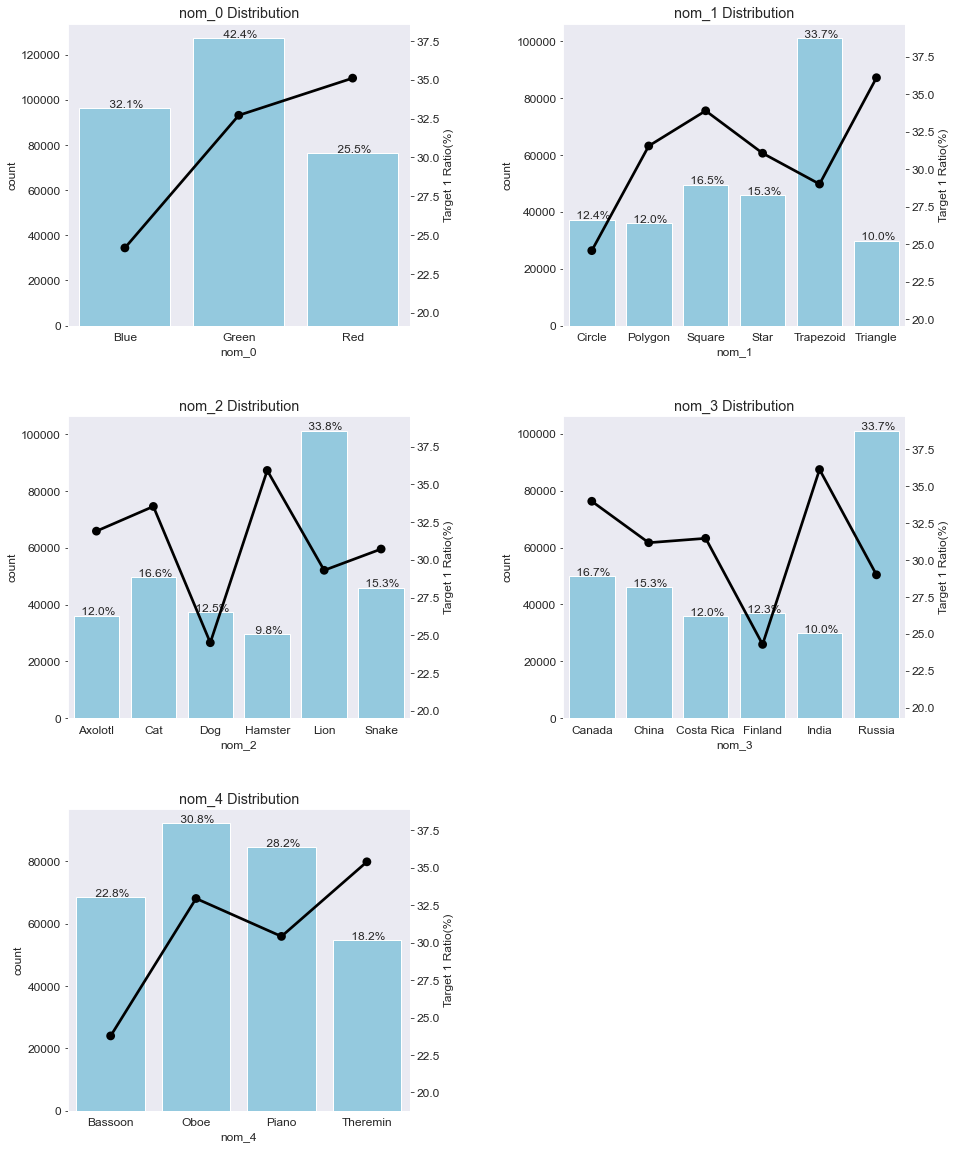

In [136]:
nom_features = ['nom_0', 'nom_1' , 'nom_2' , 'nom_3' ,'nom_4'] # 명목형 피처
plot_cat_dist_with_true_ratio(train , nom_features , num_rows= 3 , num_cols=2)

## 순서형 피처 분포

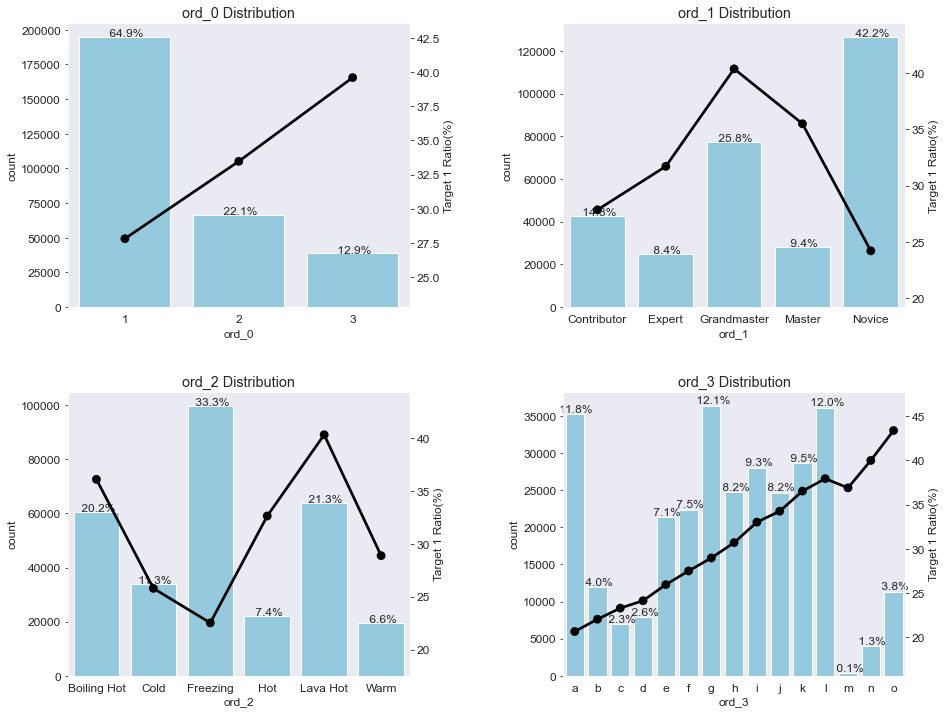

In [137]:
ord_features = ['ord_0' , 'ord_1' , 'ord_2' , 'ord_3'] # 순서형 피처
plot_cat_dist_with_true_ratio(train , ord_features , num_rows=2 , num_cols=2 , size=(15,12))

In [138]:
from pandas.api.types import CategoricalDtype

ord_1_value = ['Novice' , 'Contributor' , 'Expert' , 'Master' , 'Grandmaster']
ord_2_value = ['Freezing' , 'Cold' , 'Warm' , 'Hot' , 'Boiling Hot' , 'Lava Hot']

# 순서를 지정한 범주형 데이터 타입

ord_1_dtype = CategoricalDtype(categories = ord_1_value , ordered = True)
ord_2_dtype = CategoricalDtype(categories = ord_2_value , ordered= True)
#categories:  범주형 데이터 타입으로 인코딩할 값 목록

# 데이터 타입 변경

train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)


train.dtypes

bin_0        int64
bin_1        int64
bin_2        int64
bin_3       object
bin_4       object
nom_0       object
nom_1       object
nom_2       object
nom_3       object
nom_4       object
nom_5       object
nom_6       object
nom_7       object
nom_8       object
nom_9       object
ord_0        int64
ord_1     category
ord_2     category
ord_3       object
ord_4       object
ord_5       object
day          int64
month        int64
target       int64
dtype: object

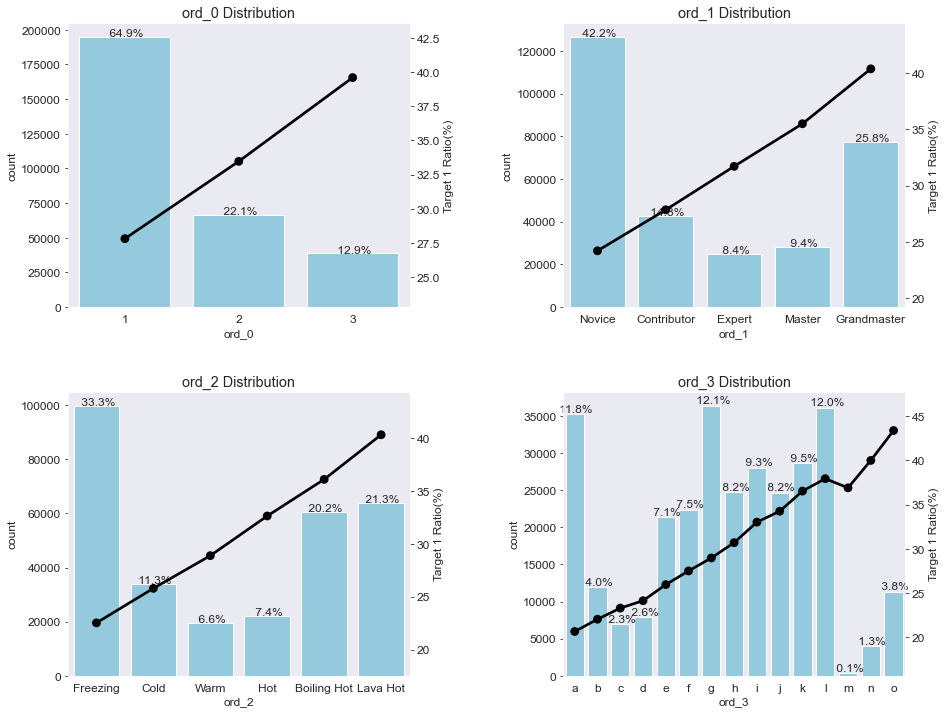

In [139]:
plot_cat_dist_with_true_ratio(train , ord_features , num_rows=2 , num_cols=2 , size=(15,12))

# ord_0은 숫자 크기 순으로, ord_1 과 ord_2 는 지정된 순서대로, ord_3는 알파벳 순으로 정렬됐다.

# 이 결과로부터 고윳값 순서에 따라 타깃값 1 비율도 비례해서 커진다는 것을 확인할 수 있다.

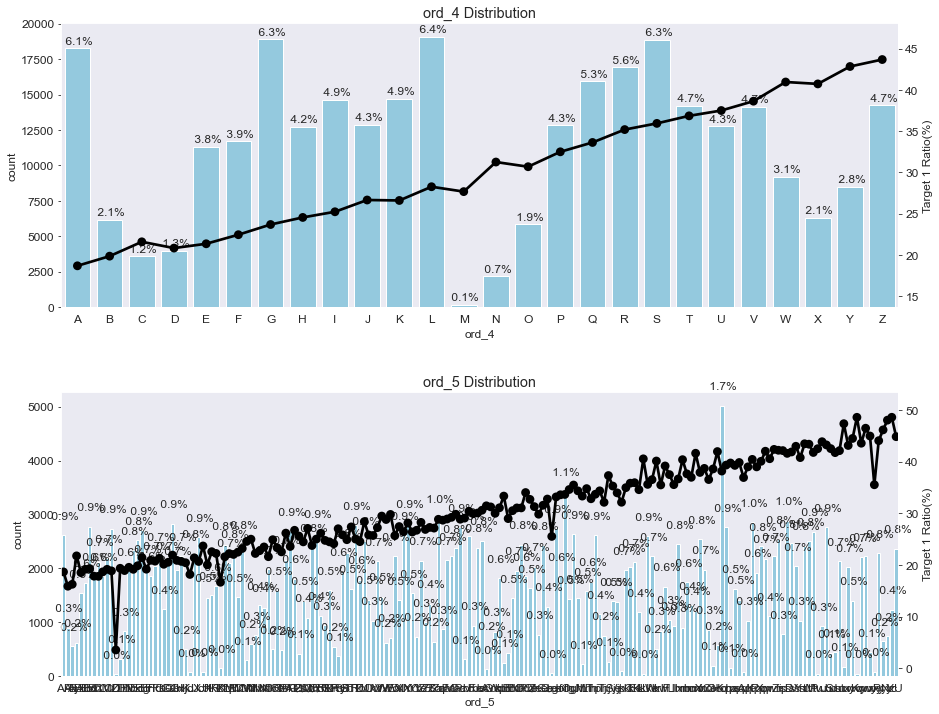

In [140]:
plot_cat_dist_with_true_ratio(train , ['ord_4' , 'ord_5'] , num_rows=2 , num_cols=1 , size=(15,12))

# ord_5는 고윳값 개수가 워낙 많아 x축 라벨이 겹쳤다.
# 그러나 타깃값 1 비율의 전체적인 양상을 보는 데는 지장이 없다.
# ord_4 , ord_5 모두 고윳값 순서에 다라 타깃값 1 비율이 증가한다.

# 순서형 피처 모두 고윳값 순서에 따라 타깃값이 1인 비율이 증가한다는 사실을 알 수 있다.

## 날짜 피처 분포

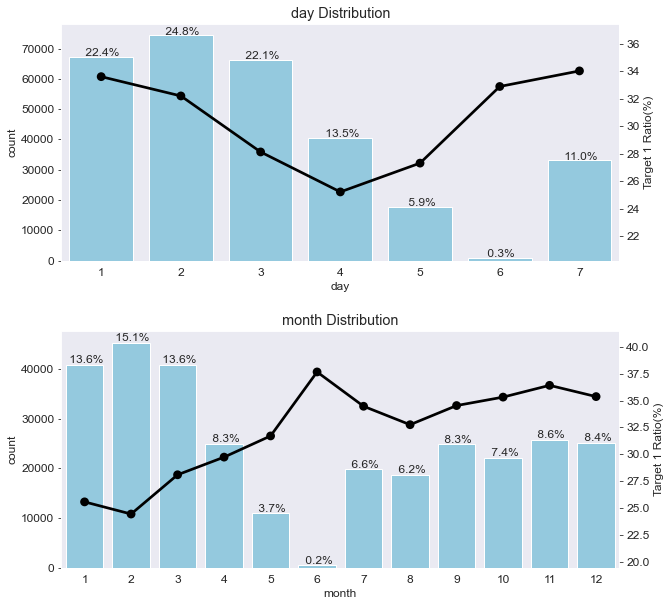

In [141]:
date_features = ['day' , 'month']
plot_cat_dist_with_true_ratio(train , date_features , num_rows= 2,  num_cols= 1 , size=(10,10))

# day 피처는 7개인 걸로 보아 요일을 의미한다고 추측할 수 있다.
# 1에서 4로 갈수록 타깃값 1 비율이 줄어들고, 4에서 7로 갈 수록 비율이 늘어난다.